Plot a scatter plot using the speed computed from the positions.

In [1]:
import GPX_functions
import numpy as np
import os
import glob
import logging
from geopy import distance
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [38]:
from matplotlib.font_manager import FontProperties
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

In [2]:
logger = logging.getLogger("Run maps")
logger.setLevel(logging.INFO)
logging.info("Starting")

In [3]:
gpxdir = "/data/GPX/Belgique/2019/"
gpxdir = "/home/ctroupin/Projects/Perso/RandoGC/GPX/"
gpxdir = "/home/ctroupin/"
gpxlist = sorted(glob.glob(os.path.join(gpxdir, "*gpx")))
nfiles = len(gpxlist)
figdir = "/data/GPX/figures/"
logger.info("Working on {} file".format(nfiles))
logger.info("Figures printed in {}".format(figdir))

INFO:Run maps:Working on 1 file
INFO:Run maps:Figures printed in /data/GPX/figures/


In [4]:
def runningmean(x, N):
        return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [6]:
def altitude_plot(lon, lat, ele, time, cmap=plt.cm.inferno, domain=[]):

    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    
    if len(domain) == 4:
        plt.xlim(domain[0], domain[1])
        plt.ylim(domain[2], domain[3])
        

    plt.plot(lon, lat, ".9", linewidth=.2)
    # norm = mpl.colors.BoundaryNorm(np.arange(8, 20.1, 2), cmap.N)
    scat= plt.scatter(lon, lat, c=ele, s=7, 
                      cmap=cmap)
  
    axins1 = inset_axes(ax,
                        width="30%",  # width = 50% of parent_bbox width
                        height="3.5%",  # height : 5%
                        loc='upper right')
    cb = plt.colorbar(scat, cax=axins1, orientation="horizontal")
    cb.set_label("Altitude (m)")
    ax.set_facecolor('.2')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.text(0.02, 0.97, time[0].strftime("%Y-%m-%d"), 
             fontsize=14, 
             transform=ax.transAxes)
    
    # Figname is defined from file name
    figname = "altitude_{}".format(time[0].strftime("%Y%m%d"))
    plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight")
    # plt.show()
    plt.close()

In [56]:
def speed_plot(lon, lat, time, speed, cmap=plt.cm.hot_r, domain=[]):

    fig = plt.figure(figsize=(10, 9))
    ax = plt.subplot(111)

    if len(domain) == 4:
        plt.xlim(domain[0], domain[1])
        plt.ylim(domain[2], domain[3])
        
        
    plt.plot(lon, lat, ".9", linewidth=.2, alpha=.5)
    norm = mpl.colors.BoundaryNorm(np.arange(16., 22.001, 1), cmap.N)
    scat= plt.scatter(lon, lat, c=speed, s=10, 
                      vmin=16., vmax=22., 
                      cmap=cmap, norm=norm)
    
    ax.text(5.872166, 50.585173, "\uf3c5", 
            fontsize=18, ha="center", va="top", zorder=7, color="#FFFFFF")
    
    ax.text(5.872166, 50.585173, "Start", fontproperties=myfont,
            fontsize=20, ha="center", va="bottom", zorder=7, color="#FFFFFF")
    
    ax.text(5.873618, 50.584865, "\uf3c5", fontproperties=fp1,
            fontsize=18, ha="center", va="top", zorder=7, color="#FFFFFF")
    
    ax.text(5.873618, 50.584865, "200 m",
            fontsize=20, ha="center", va="bottom", zorder=7, color="#FFFFFF")
    
    
  
    """
    axins1 = inset_axes(ax,
                        width="25%",  # width = 50% of parent_bbox width
                        height="3.%",  # height : 5%
                        loc='lower right', borderpad=1.,
                        bbox_to_anchor=ax.bbox)
    """
    
    cbaxes = fig.add_axes([0.65, 0.2, 0.2, 0.025]) 
    cb = plt.colorbar(scat, cax=cbaxes, orientation="horizontal", extend="both")
    cb.set_label("km/h")
    ax.set_facecolor('.2')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.text(0.02, 0.95, time[0].strftime("%Y-%m-%d"), 
             fontsize=24, 
             transform=ax.transAxes)
    
    # Figname is defined from file name
    figname = "speed_{}_start".format(time[0].strftime("%Y%m%d"))
    plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

## Loop on listed files

In [57]:
for gpxfile in gpxlist:
    lon, lat, ele, t = GPX_functions.read_gpx(gpxfile)
    speed = GPX_functions.compute_speed(lon, lat, t)
    speedQC = np.ma.masked_where((speed < 15.) | (speed > 30.), speed)
    speed_smooth = runningmean(speedQC, 10)
    #altitude_plot(lon, lat, ele, t)
    speed_plot(lon, lat, t, speedQC, cmap=plt.cm.hot_r, domain=[5.8717, 5.874, 50.58425, 50.5857])

<ipython-input-56-69bd588c7968>:13: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scat= plt.scatter(lon, lat, c=speed, s=10,


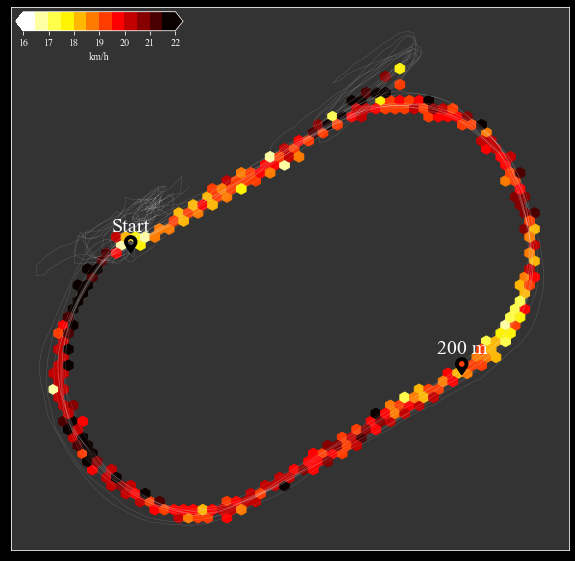

In [72]:
goodspeed = np.where((speed >= 16.) & (speed <= 30.))[0]
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

plt.plot(lon, lat, ".9", linewidth=.2, alpha=.5)

ax.text(5.872166, 50.585173, "\uf3c5", fontproperties=fp1,
        fontsize=18, ha="center", va="top", zorder=7, color="k")

ax.text(5.872166, 50.585173, "Start",
        fontsize=20, ha="center", va="bottom", zorder=7, color="#FFFFFF")

ax.text(5.873618, 50.584865, "\uf3c5", fontproperties=fp1,
        fontsize=18, ha="center", va="top", zorder=7, color="k")

ax.text(5.873618, 50.584865, "200 m",
        fontsize=20, ha="center", va="bottom", zorder=7, color="w")
    

cmap = plt.cm.inferno
norm = mpl.colors.BoundaryNorm(np.arange(16., 22.001, .5), cmap.N)

hexb = plt.hexbin(np.array(lon)[goodspeed], np.array(lat)[goodspeed], 
        C=np.array(speed)[goodspeed], gridsize=50, cmap=plt.cm.hot_r, norm=norm)
axins1 = inset_axes(ax,
                        width="30%",  # width = 50% of parent_bbox width
                        height="3.5%",  # height : 5%
                        loc='upper left')
ax.set_xticks([])
cb = plt.colorbar(hexb, cax=axins1, orientation="horizontal", extend="both")
cb.set_label("km/h")
ax.set_facecolor('.2')

ax.set_yticks([])
plt.savefig(os.path.join(figdir, "hexbin_400m_mean"))
plt.show()

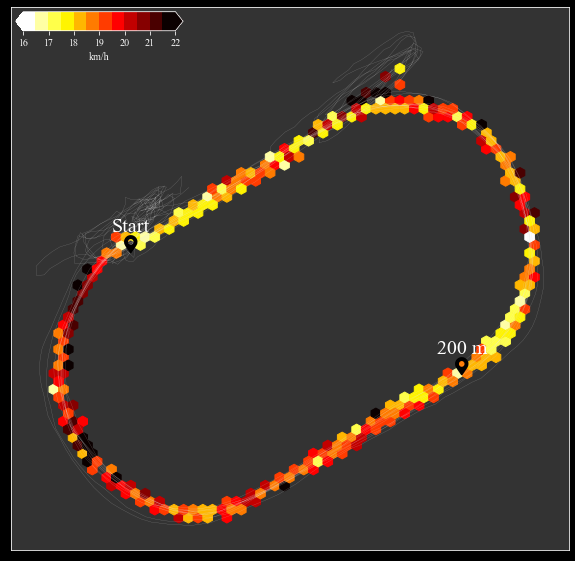

In [73]:
goodspeed = np.where((speed >= 16.) & (speed <= 30.))[0]
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

plt.plot(lon, lat, ".9", linewidth=.2, alpha=.5)

ax.text(5.872166, 50.585173, "\uf3c5", fontproperties=fp1,
        fontsize=18, ha="center", va="top", zorder=7, color="k")

ax.text(5.872166, 50.585173, "Start",
        fontsize=20, ha="center", va="bottom", zorder=7, color="#FFFFFF")

ax.text(5.873618, 50.584865, "\uf3c5", fontproperties=fp1,
        fontsize=18, ha="center", va="top", zorder=7, color="k")

ax.text(5.873618, 50.584865, "200 m",
        fontsize=20, ha="center", va="bottom", zorder=7, color="w")
    

cmap = plt.cm.inferno
norm = mpl.colors.BoundaryNorm(np.arange(16., 22.001, .5), cmap.N)

hexb = plt.hexbin(np.array(lon)[goodspeed], np.array(lat)[goodspeed], 
                  C=np.array(speed)[goodspeed], gridsize=50, cmap=plt.cm.hot_r, norm=norm,
                  reduce_C_function=np.min)
axins1 = inset_axes(ax,
                        width="30%",  # width = 50% of parent_bbox width
                        height="3.5%",  # height : 5%
                        loc='upper left')
ax.set_xticks([])
cb = plt.colorbar(hexb, cax=axins1, orientation="horizontal", extend="both")
cb.set_label("km/h")
ax.set_facecolor('.2')

ax.set_yticks([])
plt.savefig(os.path.join(figdir, "hexbin_400m_min"))
plt.show()

## 3D plot

In [45]:
from mpl_toolkits.mplot3d import Axes3D 

In [78]:
lon, lat, ele, t = GPX_functions.read_gpx("/home/ctroupin/Move_2020_08_18_17_56_44_Running.gpx")
speed = GPX_functions.compute_speed(lon, lat, t)
speedQC = np.ma.masked_where((speed < 3.) | (speed > 30.), speed)
    
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(lon, lat, ele, c=speedQC, s=3, cmap=plt.cm.hot_r, vmin=7.5, vmax=15.)
plt.xlim(np.array(lon).min(), np.array(lon).max())
plt.ylim(np.array(lat).min(), np.array(lat).max())
#plt.ylim(domain[2], domain[3])
ax.set_xticks([])
ax.set_yticks([])
#ax.set_zticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.colorbar(scat, extend="both", shrink=.8)

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(False)
ax.view_init(elev=40., azim=60)
plt.savefig(os.path.join(figdir, "scatter3D"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()